In [1]:
import numpy as np
import xgboost as xgb
from xgboost import plot_importance, plot_tree

from sklearn.model_selection import train_test_split

In [2]:
X = np.load("./data/tatanic_X_train.npy")
y = np.load("./data/tatanic_y_train.npy")

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [4]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [5]:
param = {'max_depth': 2, 'eta': 0.5, 'silent': 1, 
        'objective': 'binary:logistic'}
param['nthread'] = 7
param['eval_metric'] = 'auc'
evallist = [(dtest, 'eval'), (dtrain, 'train')]
plst = param.items()

In [6]:
num_round = 50
bst = xgb.train(param, dtrain, num_round, evallist)

[00:56:58] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	eval-auc:0.77447	train-auc:0.84592
[1]	eval-auc:0.84385	train-auc:0.86727
[2]	eval-auc:0.84858	train-auc:0.86926
[3]	eval-auc:0.83788	train-auc:0.87747
[4]	eval-auc:0.84163	train-auc:0.88201
[5]	eval-auc:0.84469	train-auc:0.88526
[6]	eval-auc:0.84712	train-auc:0.89012
[7]	eval-auc:0.85004	train-auc:0.89479
[8]	eval-auc:0.84413	train-auc:0.89788
[9]	eval-auc:0.85407	train-auc:0.89704
[10]	eval-auc:0.84330	train-auc:0.90139
[11]	eval-auc:0.84372	train-auc:0.90389
[12]	eval-auc:0.83829	train-auc:0.90538
[13]	eval-auc:0.83836	train-auc:0.90733
[14]

/usr/local/Caskroom/miniconda/base/envs/da/lib/python3.8/site-packages/xgboost/core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


In [21]:
ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)


/usr/local/Caskroom/miniconda/base/envs/da/lib/python3.8/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
ypred

array([0.10395536, 0.30885208, 0.90419155, 0.98099613, 0.15968569,
       0.05409168, 0.09355904, 0.05476698, 0.4958432 , 0.92516357,
       0.15968569, 0.04495731, 0.17552204, 0.03064409, 0.10709848,
       0.14598042, 0.9162554 , 0.96783316, 0.2989703 , 0.35582304,
       0.09410666, 0.29709747, 0.37002876, 0.0849557 , 0.09507184,
       0.08328585, 0.2712984 , 0.03387171, 0.20285822, 0.04495731,
       0.46181372, 0.7342021 , 0.7342021 , 0.10743421, 0.97883135,
       0.27773726, 0.05326642, 0.13717727, 0.04989238, 0.76879627,
       0.96697026, 0.83271164, 0.24710561, 0.272863  , 0.10392904,
       0.6010822 , 0.84335774, 0.04018686, 0.05204476, 0.5370867 ,
       0.1855206 , 0.9042972 , 0.9639231 , 0.06720204, 0.10683245,
       0.47707456, 0.614683  , 0.9567352 , 0.15518299, 0.09599862,
       0.1855206 , 0.30038854, 0.8281193 , 0.9806034 , 0.45992404,
       0.8389416 , 0.13033246, 0.97686267, 0.06514429, 0.43301854,
       0.04868938, 0.96846116, 0.6684059 , 0.97567797, 0.10079

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

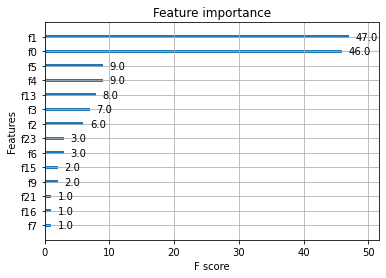

In [24]:
plot_importance(bst)

<AxesSubplot:>

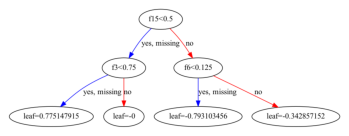

In [25]:
plot_tree(bst)